In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
print(os.getcwd())
      

c:\Users\Sagar N\Desktop\Potato\Potato-Disease-Classification-using-Deep-Learning


In [ ]:
# Make a Dataset

batch_size = 32
image_size = 256

dataset = keras.preprocessing.image_dataset_from_directory(directory=os.path.join('dataset'),
                                                           batch_size=batch_size,
                                                           image_size=(image_size, image_size),
                                                           shuffle=True)
dataset

Found 2152 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [15]:
len(dataset)

68

In [16]:
93 * batch_size

2976

In [7]:
# No of images in last badge

32 - (2976 - 2948)

4

In [17]:
def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)
    train_batch_count = int(dataset_batch_count * train_size)
    validation_test_batch_count = int(dataset_batch_count * validation_size)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)

    train_ds = dataset.take(train_batch_count)
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)

    return train_ds, validation_ds, test_ds

In [18]:
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

(256, 256, 3)
[[[184. 174. 183.]
  [177. 167. 176.]
  [186. 176. 185.]
  ...
  [149. 138. 146.]
  [182. 171. 179.]
  [170. 159. 167.]]

 [[178. 168. 177.]
  [166. 156. 165.]
  [167. 157. 166.]
  ...
  [175. 164. 172.]
  [165. 154. 162.]
  [182. 171. 179.]]

 [[179. 169. 178.]
  [179. 169. 178.]
  [182. 172. 181.]
  ...
  [194. 183. 191.]
  [172. 161. 169.]
  [185. 174. 182.]]

 ...

 [[156. 137. 143.]
  [152. 133. 139.]
  [154. 135. 141.]
  ...
  [150. 131. 133.]
  [170. 151. 153.]
  [150. 131. 133.]]

 [[159. 140. 146.]
  [155. 136. 142.]
  [157. 138. 144.]
  ...
  [147. 128. 130.]
  [163. 144. 146.]
  [145. 126. 128.]]

 [[160. 141. 147.]
  [155. 136. 142.]
  [157. 138. 144.]
  ...
  [129. 110. 112.]
  [167. 148. 150.]
  [181. 162. 164.]]]

(32,)
2



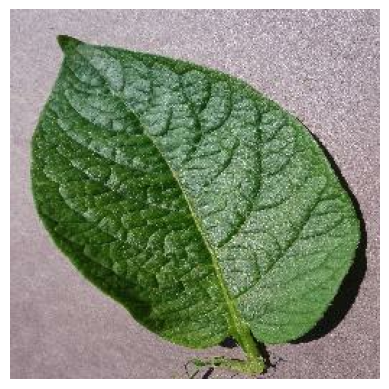

In [19]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.numpy()[0].shape)
    print(image_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    plt.imshow(image_batch.numpy()[0].astype('uint8'))
    plt.axis('off')

In [20]:
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
# Build Data Pipeline

train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
channel = 3  # RGB
input_shape = (batch_size, image_size, image_size, channel)
target = 3  # len(class_names)

input_shape

(32, 256, 256, 3)

In [ ]:
# Image Data Preprocessing

preprocessing = keras.Sequential([
                    keras.layers.Resizing(height=image_size, width=image_size),
                    keras.layers.Rescaling(scale=1./255),
                    keras.layers.RandomFlip(mode='horizontal_and_vertical'),
                    keras.layers.RandomRotation(factor=0.2)
                ])
preprocessing 

<Sequential name=sequential, built=False>

In [25]:
# Build CNN Architecture

model = keras.Sequential([
            # CNN
            preprocessing,
            keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # ANN
            keras.layers.Flatten(),
            keras.layers.Dense(units=64, activation='relu'),
            keras.layers.Dense(units=target, activation='softmax')
        ])
model

<Sequential name=sequential_1, built=False>

In [18]:
model.build(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model 

<Sequential name=sequential_1, built=False>

In [35]:
history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=35,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.7016 - loss: 0.6307 - val_accuracy: 0.7812 - val_loss: 0.4824
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8412 - loss: 0.3842 - val_accuracy: 0.8281 - val_loss: 0.4001
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8606 - loss: 0.3164 - val_accuracy: 0.8906 - val_loss: 0.2904
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9050 - loss: 0.2590 - val_accuracy: 0.9062 - val_loss: 0.2400
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 352s 7s/step - accuracy: 0.9047 - loss: 0.2371 - val_accuracy: 0.9062 - val_loss: 0.2179
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9162 - loss: 0.2003 - val_accuracy: 0.9062 - val_loss: 0.2094
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9195 - loss: 0.1964 - val_accuracy: 0.9271 - val_loss: 0.1818
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9270 - loss: 0.1869 - val_accuracy: 0.9427 - va

KeyboardInterrupt: 

In [36]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.9626 - loss: 0.0976


[0.1445637345314026, 0.9375]

In [37]:
history.params

NameError: name 'history' is not defined

In [34]:
history.history.keys()

NameError: name 'history' is not defined

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
acc[0:5]

[0.6568375825881958,
 0.8700854778289795,
 0.8858974575996399,
 0.9269230961799622,
 0.9217948913574219]

In [26]:
len(acc), len(val_acc), len(loss), len(val_loss)

(35, 35, 35, 35)

In [ ]:
model.save('model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

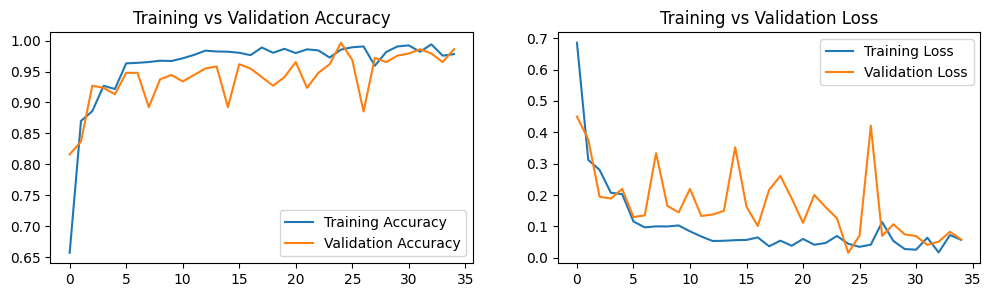

In [28]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [29]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [30]:
def prediction(image_path, class_names = dataset.class_names):

    img = Image.open(image_path).resize((256,256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    model = tf.keras.models.load_model('model.h5')
    prediction = model.predict(img_array)

    predicted_class = class_names[np.argmax(prediction)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')
    print('')
    plt.imshow(img)
    plt.axis('off')


1/1 [==============================] - 0s 473ms/step
Predicted Class : Potato___Early_blight
Confident : 100.0%



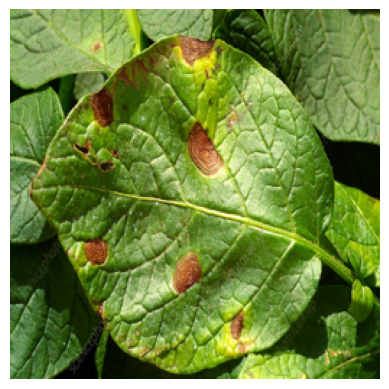

In [32]:
prediction(image_path='potato_early_blight.jpg')

1/1 [==============================] - 0s 96ms/step
Predicted Class : Potato___Late_blight
Confident : 93.74%



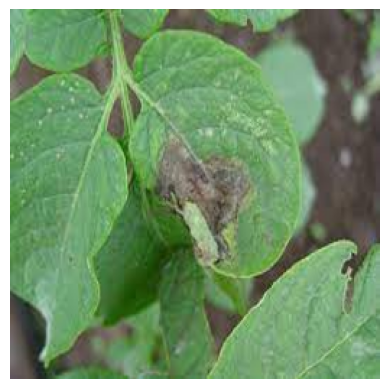

In [33]:
prediction(image_path='potato_late_blight.jpg')

1/1 [==============================] - 0s 101ms/step
Predicted Class : Potato___healthy
Confident : 99.94%



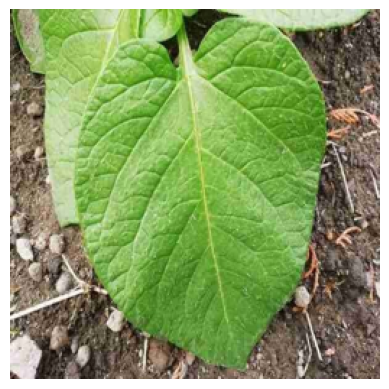

In [34]:
prediction(image_path='potato_healthy.jpg')